In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

EDA

In [108]:
data=pd.read_csv("uber_dataset.csv")
data.head()

,Priceperweek,Population,Monthlyincome,Averageparkingpermonth,Numberofweeklyriders
0,15,1800000,5800,50,192000
1,15,1790000,6200,50,190400
2,15,1780000,6400,60,191200
3,25,1778000,6500,60,177600
4,25,1750000,6550,60,176800


In [110]:
data.tail()

,Priceperweek,Population,Monthlyincome,Averageparkingpermonth,Numberofweeklyriders
22,86,1590000,15000,165,126240
23,98,1595000,15200,175,123888
24,87,1590000,15600,175,126080
25,77,1600000,16000,190,151680
26,63,1610000,16200,200,152800


In [112]:
data.describe()

,Priceperweek,Population,Monthlyincome,Averageparkingpermonth,Numberofweeklyriders
count,27.000000,2.700000e+01,27.000000,27.000000,27.000000
mean,49.925926,1.680111e+06,11063.259259,107.037037,160026.074074
std,27.627921,6.780307e+04,3416.627944,45.346089,21301.097303
min,15.000000,1.590000e+06,5800.000000,50.000000,115696.000000
25%,27.500000,1.617500e+06,8400.000000,75.000000,149600.000000
50%,40.000000,1.695000e+06,11600.000000,100.000000,161600.000000
75%,75.000000,1.725000e+06,13888.000000,140.000000,176000.000000
max,102.000000,1.800000e+06,16200.000000,200.000000,192000.000000


In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Priceperweek            27 non-null     int64
 1   Population              27 non-null     int64
 2   Monthlyincome           27 non-null     int64
 3   Averageparkingpermonth  27 non-null     int64
 4   Numberofweeklyriders    27 non-null     int64
dtypes: int64(5)
memory usage: 1.2 KB


In [116]:
for col in data.columns:
    print(f"--------------- {col} ------------------\n")
    print(f"==> Max: {data[col].max()} \n")
    print(f"==> Min: {data[col].min()} \n")
    print(f"==> Mean: {data[col].mean()} \n")
    print(f"==> Median: {data[col].median()} \n")
    print(f"==> Value Counts:\n{data[col].value_counts()}\n")


--------------- Priceperweek ------------------

==> Max: 102 

==> Min: 15 

==> Mean: 49.925925925925924 

==> Median: 40.0 

==> Value Counts:
Priceperweek
40     5
25     4
30     4
15     3
75     3
65     1
102    1
80     1
86     1
98     1
87     1
77     1
63     1
Name: count, dtype: int64

--------------- Population ------------------

==> Max: 1800000 

==> Min: 1590000 

==> Mean: 1680111.111111111 

==> Median: 1695000.0 

==> Value Counts:
Population
1695000    2
1590000    2
1725000    2
1630000    2
1690000    1
1600000    1
1595000    1
1605000    1
1615000    1
1620000    1
1635000    1
1640000    1
1800000    1
1790000    1
1700000    1
1710000    1
1705000    1
1720000    1
1740000    1
1750000    1
1778000    1
1780000    1
1610000    1
Name: count, dtype: int64

--------------- Monthlyincome ------------------

==> Max: 16200 

==> Min: 5800 

==> Mean: 11063.25925925926 

==> Median: 11600.0 

==> Value Counts:
Monthlyincome
5800     1
11800    1
16000    1
156

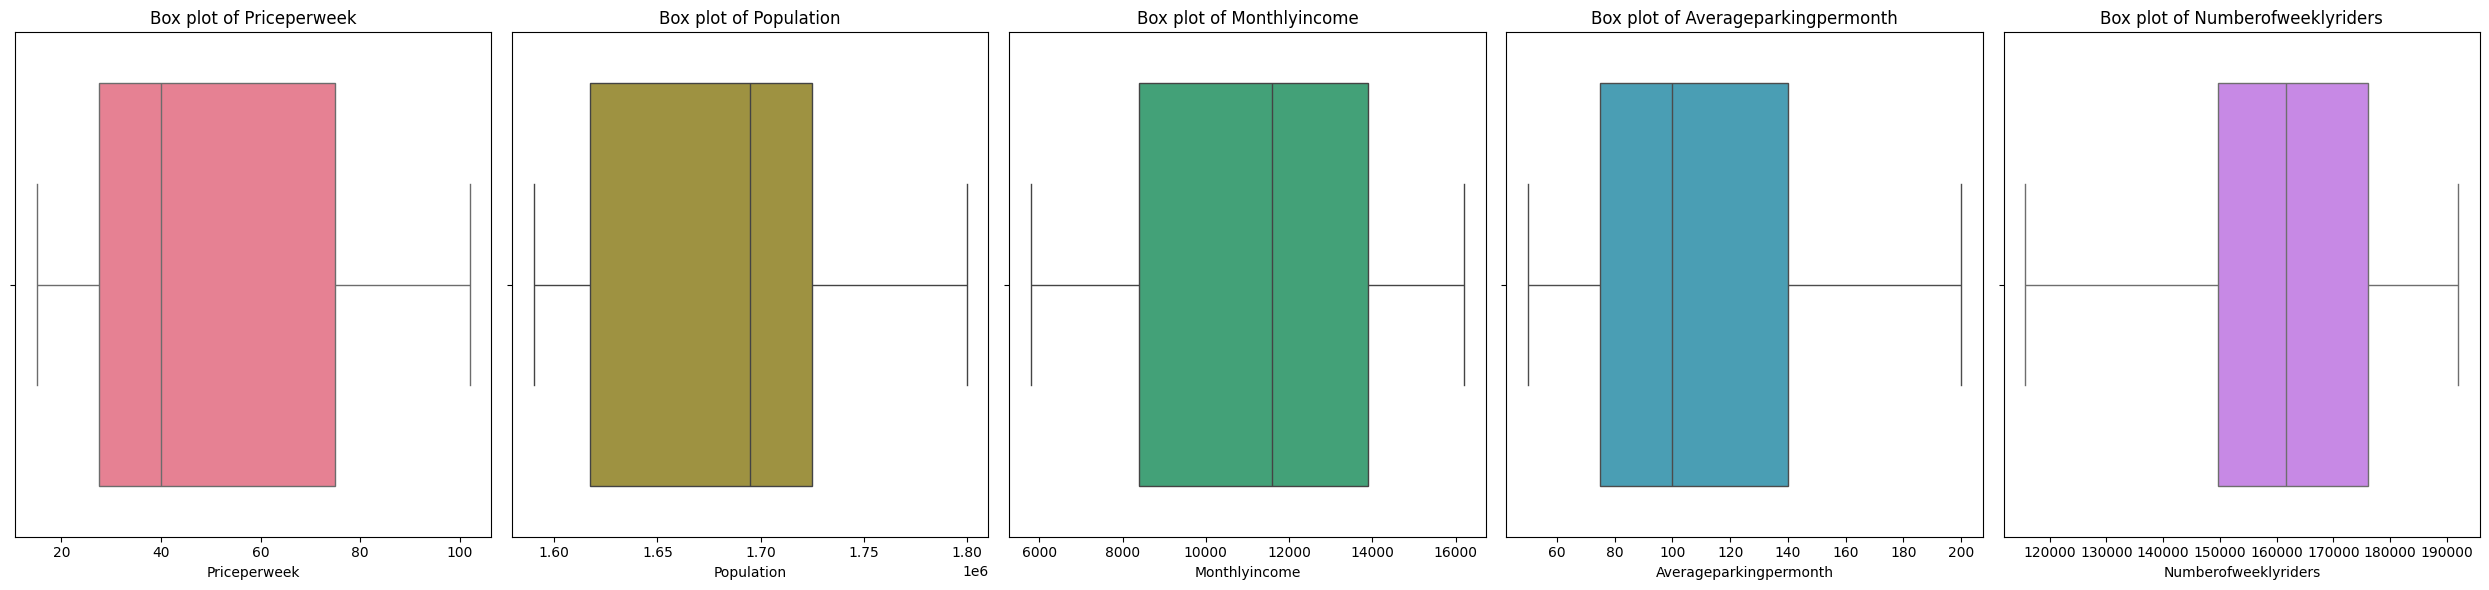

In [118]:
colors = sns.color_palette("husl", len(data.columns))
num_cols = len(data.columns)
fig, axes = plt.subplots(nrows=1, ncols=num_cols, figsize=(5 * num_cols, 6))

for ax, col, color in zip(axes, data.columns, colors):
    sns.boxplot(x=data[col], ax=ax, color=color)
    ax.set_title(f'Box plot of {col}')

plt.tight_layout()
plt.show()

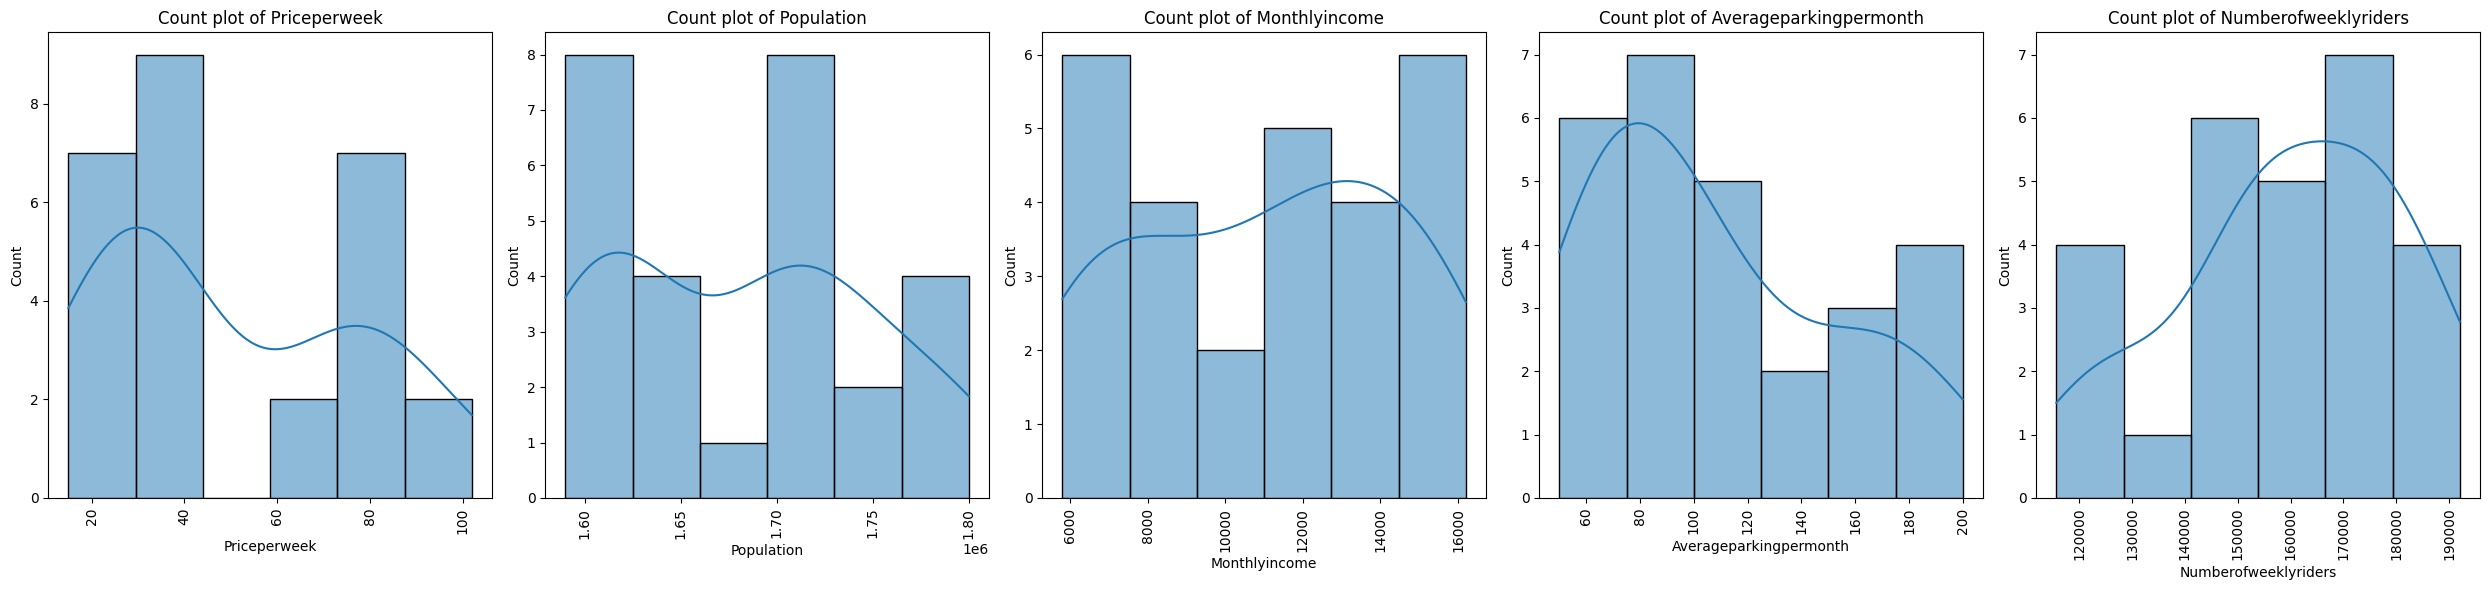

In [119]:
num_cols = len(data.columns)
fig, axes = plt.subplots(nrows=1, ncols=num_cols, figsize=(5 * num_cols, 6))

for ax, col in zip(axes, data.columns):
    sns.histplot(x=data[col], ax=ax,kde=True)  
    ax.set_title(f'Count plot of {col}')
    ax.set_xlabel(col)  
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

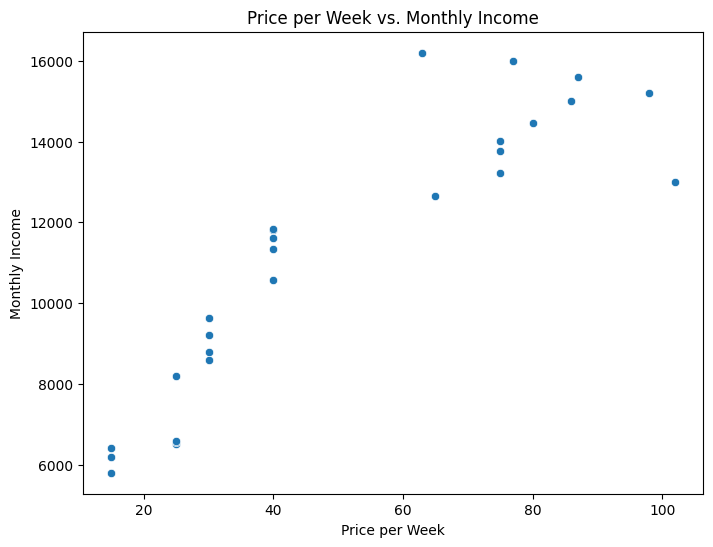

In [121]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Priceperweek', y='Monthlyincome')
plt.title('Price per Week vs. Monthly Income')
plt.xlabel('Price per Week')
plt.ylabel('Monthly Income')
plt.show()

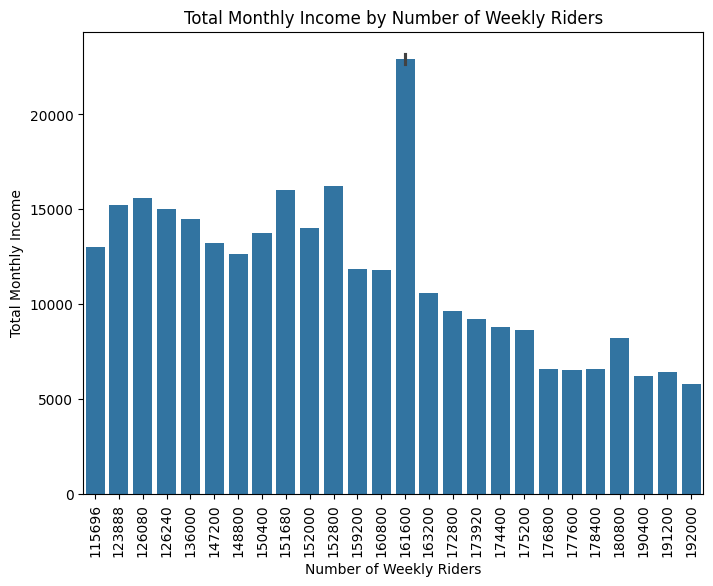

In [122]:
plt.figure(figsize=(8, 6))
sns.barplot(data=data, x='Numberofweeklyriders', y='Monthlyincome', estimator=sum)
plt.title('Total Monthly Income by Number of Weekly Riders')
plt.xlabel('Number of Weekly Riders')
plt.ylabel('Total Monthly Income')
plt.xticks(rotation=90)
plt.show()


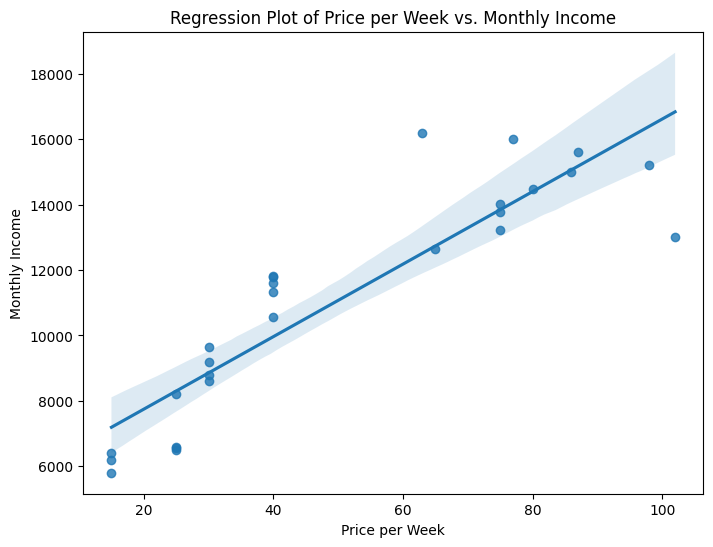

In [123]:
plt.figure(figsize=(8, 6))
sns.regplot(data=data, x='Priceperweek', y='Monthlyincome')
plt.title('Regression Plot of Price per Week vs. Monthly Income')
plt.xlabel('Price per Week')
plt.ylabel('Monthly Income')
plt.show()

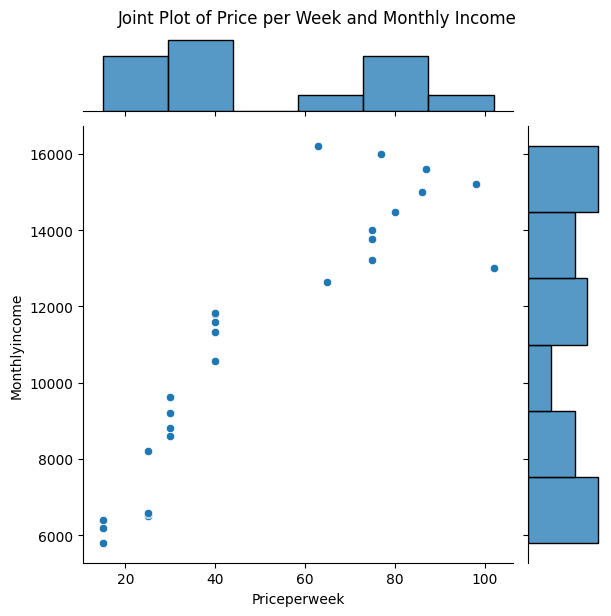

In [126]:
sns.jointplot(data=data, x='Priceperweek', y='Monthlyincome', kind='scatter')
plt.suptitle('Joint Plot of Price per Week and Monthly Income', y=1.02)
plt.show()

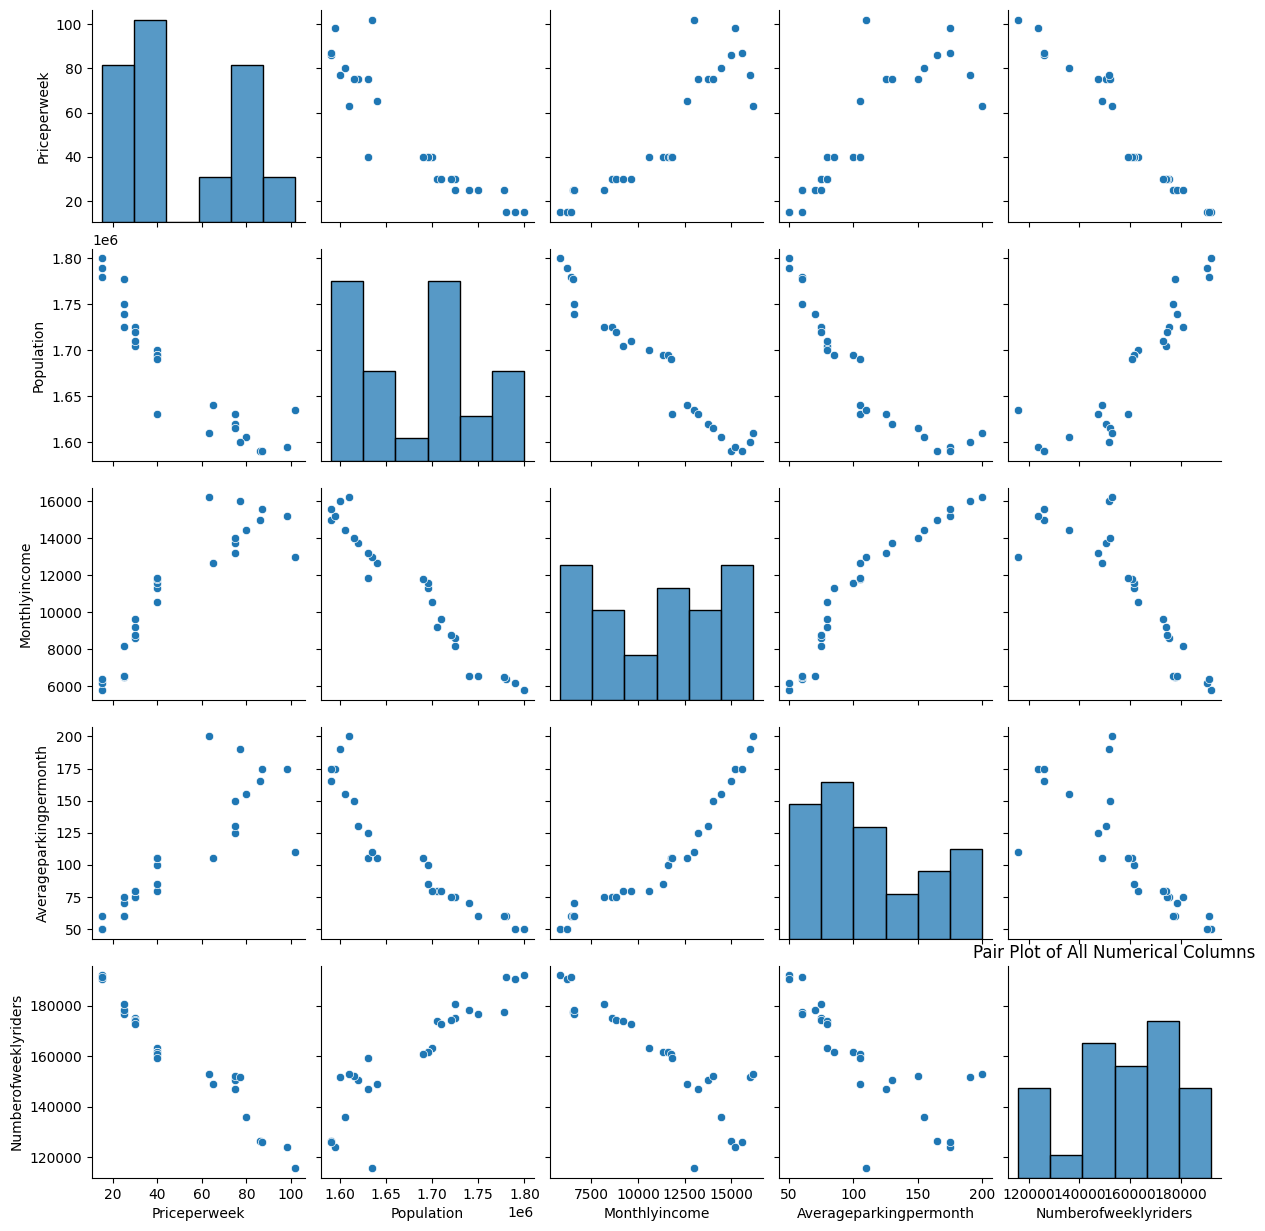

In [129]:
sns.pairplot(data)
plt.title('Pair Plot of All Numerical Columns')
plt.show()

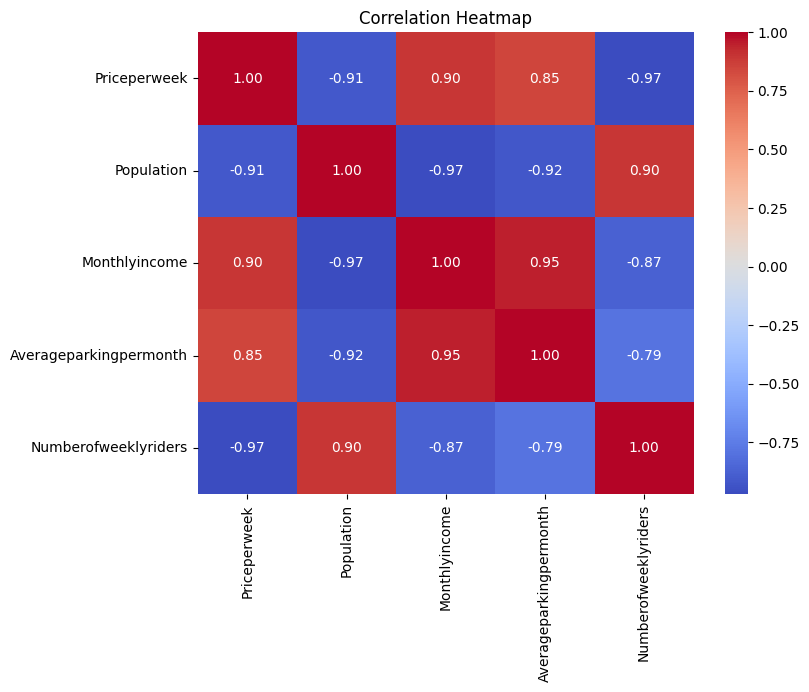

In [131]:
plt.figure(figsize=(8, 6))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Data Preprocessing

In [133]:
data.isnull().sum()

Priceperweek              0
Population                0
Monthlyincome             0
Averageparkingpermonth    0
Numberofweeklyriders      0
dtype: int64

In [134]:
X=data.iloc[:,:-1]
Y=data.iloc[:,-1]
X.head()

,Priceperweek,Population,Monthlyincome,Averageparkingpermonth
0,15,1800000,5800,50
1,15,1790000,6200,50
2,15,1780000,6400,60
3,25,1778000,6500,60
4,25,1750000,6550,60


In [135]:
Y.head()

0    192000
1    190400
2    191200
3    177600
4    176800
Name: Numberofweeklyriders, dtype: int64

In [136]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.3,random_state=42)

In [143]:
#scaler=MinMaxScaler()
#x_train["Population"]=scaler.fit_transform(x_train["Population"].values.reshape(-1, 1))
#x_test["Population"]=scaler.fit_transform(x_test["Population"].values.reshape(-1, 1))

In [145]:
x_train.head()

,Priceperweek,Population,Monthlyincome,Averageparkingpermonth
24,87,1590000,15600,175
1,15,1790000,6200,50
4,25,1750000,6550,60
5,25,1740000,6580,70
2,15,1780000,6400,60


In [147]:
y_train

24    126080
1     190400
4     176800
5     178400
2     191200
15    159200
22    126240
3     177600
25    151680
23    123888
18    147200
26    152800
20    152000
7     175200
10    172800
14    160800
19    150400
6     180800
Name: Numberofweeklyriders, dtype: int64

In [149]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [151]:
y_pred=reg.predict(x_test)
y_pred

array([174616.14046152, 169014.18298305, 173424.44493672, 138910.62549881,
       189468.43963632, 167889.32606295, 148484.79928331, 125839.98908894,
       168155.81815997])

In [153]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
score = reg.score(x_test, y_test)*100  
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')
print(f'Model Score (R^2): {score:.2f}')

Mean Absolute Error: 3919.16
Mean Squared Error: 26456815.14
R-squared: 0.94
Model Score (R^2): 94.17


In [155]:
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 
    'C': [0.1, 1, 10, 100],  
    'epsilon': [0.1, 0.2, 0.5]  
}


model = SVR()


grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='r2', cv=5)
grid_search.fit(x_train, y_train)
best_SVR = grid_search.best_estimator_

In [157]:
y_pred=best_SVR.predict(x_test)
y_pred

array([170356.33450988, 174844.42960265, 161744.60587219, 127322.98856261,
       208682.93497375, 169745.08219054, 139502.3453131 , 138488.58792785,
       172408.19119933])

In [159]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
score = best_SVR.score(x_test, y_test)*100  
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')
print(f'Model Score (R^2): {score:.2f}')

Mean Absolute Error: 11585.22
Mean Squared Error: 162135640.01
R-squared: 0.64
Model Score (R^2): 64.29


In [161]:
param_grid = {
    'criterion': ['squared_error', 'absolute_error'],  
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

model = DecisionTreeRegressor()

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='r2', cv=5)
grid_search.fit(x_train, y_train)

best_Tree = grid_search.best_estimator_

In [162]:
y_pred=best_Tree.predict(x_test)
y_pred

array([174000.        , 160000.        , 174000.        , 151720.        ,
       190800.        , 174000.        , 147200.        , 125402.66666667,
       174000.        ])

In [165]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
score = best_Tree.score(x_test, y_test)*100  
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')
print(f'Model Score (R^2): {score:.2f}')

Mean Absolute Error: 5945.19
Mean Squared Error: 68718241.98
R-squared: 0.85
Model Score (R^2): 84.87


In [167]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.5, 0.8, 1.0],
    'colsample_bytree': [0.5, 0.8, 1.0]
}

model = XGBRegressor()

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='r2', cv=5)
grid_search.fit(x_train, y_train)

best_xg = grid_search.best_estimator_

In [168]:
y_pred=best_xg.predict(x_test)
y_pred

array([173076.4 , 160450.75, 168935.84, 146899.97, 189379.05, 160450.75,
       152980.92, 133270.1 , 160450.75], dtype=float32)

In [169]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
score = best_xg.score(x_test, y_test)*100  
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')
print(f'Model Score (R^2): {score:.2f}')

Mean Absolute Error: 5181.27
Mean Squared Error: 54311248.17
R-squared: 0.88
Model Score (R^2): 88.04


In [170]:
import pickle
pickle.dump(reg,open("model.pkl","wb"))

model=pickle.load(open("model.pkl","rb"))